In [ ]:
# https://www.section.io/engineering-education/image-preprocessing-in-python/

# library

In [1]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, ResNet152, VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Average
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import random
import time
opt = Adam(learning_rate = 0.0001)
model_path = './model_224_32_50'

In [2]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# converting to greyscale

In [60]:
import skimage
print(skimage.__version__)

0.22.0


In [143]:
# importing libraries
import tensorflow 
import keras  
import os
import glob 
from skimage import io 
import random 
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline
import cv2

In [145]:
import os

# Specify the directory containing the images
image_directory = 'C:/Users/PC/Desktop/Github Projects/SAM-transfer learning/Pituitary Classification/data/train/no_tumor/'

# Create an empty list to store the URLs
image_urls = []

# Iterate through the files in the directory
for filename in os.listdir(image_directory):
    # Check if the file is an image (you can customize this condition)
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
        # Create a URL using the file path
        file_path = os.path.join(image_directory, filename)
        file_url = file_path  # For local file URLs
        # Append the URL to the list
        image_urls.append(file_url)

In [146]:
len(image_urls)

1330

In [147]:
image_urls

['C:/Users/PC/Desktop/Github Projects/SAM-transfer learning/Pituitary Classification/data/train/no_tumor/1 no.jpeg',
 'C:/Users/PC/Desktop/Github Projects/SAM-transfer learning/Pituitary Classification/data/train/no_tumor/1.jpg',
 'C:/Users/PC/Desktop/Github Projects/SAM-transfer learning/Pituitary Classification/data/train/no_tumor/10 no.jpg',
 'C:/Users/PC/Desktop/Github Projects/SAM-transfer learning/Pituitary Classification/data/train/no_tumor/11 no.jpg',
 'C:/Users/PC/Desktop/Github Projects/SAM-transfer learning/Pituitary Classification/data/train/no_tumor/12 no.jpg',
 'C:/Users/PC/Desktop/Github Projects/SAM-transfer learning/Pituitary Classification/data/train/no_tumor/13 no.jpg',
 'C:/Users/PC/Desktop/Github Projects/SAM-transfer learning/Pituitary Classification/data/train/no_tumor/14 no.jpg',
 'C:/Users/PC/Desktop/Github Projects/SAM-transfer learning/Pituitary Classification/data/train/no_tumor/15 no.jpg',
 'C:/Users/PC/Desktop/Github Projects/SAM-transfer learning/Pituitar

In [150]:
# Create a directory to save the preprocessed images
output_directory = 'C:/Users/PC/Downloads/d2/seg_to_grey_no_tumor/'
os.makedirs(output_directory, exist_ok=True)

preprocessed_images = []
count = 0
# Iterate through the list and preprocess each image
for i in image_urls:
    image = cv2.imread(i)
    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Filename 
    filename = os.path.basename(i)
  
    # Using cv2.imwrite() method 
    # Saving the image 
    cv2.imwrite(output_directory+filename, grayscale) 

# Data Augmentation

In [ ]:
import os
import cv2
import numpy as np
from PIL import Image
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# Define the directory containing your original images
original_data_dir = '/content/drive/MyDrive/Colab Notebooks/data/train/no_tumor'


# Define the directory where augmented images will be saved
augmented_data_dir = '/content/drive/MyDrive/Colab Notebooks/data/augmented_images/no_tumor'

# Define data augmentation parameters
datagen = ImageDataGenerator(
   rotation_range=10,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  shear_range=0.1,
                                  brightness_range=(0.3, 1.0),
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  fill_mode='nearest'
)

# List all image files in the original directory
image_files = os.listdir(original_data_dir)

# Apply data augmentation and save augmented images
for img_file in image_files:
    img_path = os.path.join(original_data_dir, img_file)
    img = Image.open(img_path)
    rgb_im = img.convert('RGB')
    img = rgb_im
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)

    # Generate augmented images
    aug_iter = datagen.flow(img, save_to_dir=augmented_data_dir, save_prefix='aug', save_format='jpg')

    # Generate and save multiple augmented images
    num_augmented_images = 1  # You can change this number as needed
    for i in range(num_augmented_images):
        next(aug_iter)

print("Data augmentation complete.")

Data augmentation complete.


# Data Preparing

In [77]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)


# Set the image size, batch size, and number of classes
img_width, img_height = 224, 224
batch_size = 32
num_classes = 2


# Define the paths to your training and validation data directories
data_dir = './data_original'
#train_data = './Brain Tumor/Training - Full'
#test_data = './Brain Tumor/Testing - Full'

# Define the data generators for training and validation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)


train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

valid_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 2471 images belonging to 2 classes.
Found 617 images belonging to 2 classes.


In [78]:
# Get the class names
class_names = list(train_generator.class_indices.keys())

In [79]:
class_names

['no_tumor', 'pituitary']

# converting image generator to X, Y

In [ ]:
#converting image generator to X, Y

import tqdm

train_generator.reset()

X_train, y_train = next(train_generator)
for i in tqdm.tqdm(range(int(train_generator.n/batch_size))):
  img, label = next(train_generator)
  X_train = np.append(X_train, img, axis=0 )
  y_train = np.append(y_train, label, axis=0)
print(X_train.shape, y_train.shape)

100%|██████████| 77/77 [09:16<00:00,  7.22s/it]

(2470, 256, 256, 3) (2470, 2)


In [ ]:
valid_generator.reset()
X_test, y_test = next(valid_generator)
for i in tqdm.tqdm(range(int(valid_generator.n/batch_size))):
  img, label = next(valid_generator)
  X_test = np.append(X_test, img, axis=0 )
  y_test = np.append(y_test, label, axis=0)
print(X_test.shape, y_test.shape)


100%|██████████| 19/19 [02:08<00:00,  6.78s/it]

(617, 256, 256, 3) (617, 2)


# Data Preprocessing using densenet

In [ ]:
from keras.applications.densenet import DenseNet121
from keras.preprocessing import image
from keras.applications.densenet import preprocess_input
import numpy as np

img_path = '/content/drive/MyDrive/Colab Notebooks/data/train/pituitary/1000.png'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

#tf.keras.applications.densenet.preprocess_input(
#    x, data_format=None
#)

In [68]:
from PIL import Image
import os

directory = 'C:/Users/PC/Desktop/Github Projects/SAM-transfer learning/Pituitary Classification/data/train/pituitary'

image_list = []

for filename in os.listdir(directory):
    #if filename.endswith('.jpg') or filename.endswith('.png'):  # Filter by file extension
        image_path = os.path.join(directory, filename)
        img = Image.open(image_path)
        image_list.append(img)

In [69]:
len(image_list)

1757

In [ ]:
image_list

In [ ]:
# Create a list to store preprocessed images
from tensorflow.keras.applications.densenet import preprocess_input
preprocessed_images = []

# Iterate through the list and preprocess each image
for image in image_list:
    # Convert the PIL Image to a NumPy array
    image_array = np.asarray(image)

    # Preprocess the NumPy array
    preprocessed_image = tf.keras.applications.densenet.preprocess_input(image_array)

    # Append the preprocessed array to the list
    preprocessed_images.append(preprocessed_image)

In [ ]:
len(preprocessed_images)

1757

In [ ]:
from PIL import Image
import numpy as np

# Replace 'preprocessed_images' with your list of preprocessed NumPy array images
#preprocessed_images = [image1, image2, image3, ...]  # Each element is a NumPy array

# Create a directory to save the preprocessed images
output_directory = '/content/drive/MyDrive/Colab Notebooks/data/train/preprocessed_pituitary_images'
os.makedirs(output_directory, exist_ok=True)

# Iterate through the list of preprocessed images and save them
for i, image_array in enumerate(preprocessed_images):
    # Convert the NumPy array to a PIL Image
    image = Image.fromarray(np.uint8(image_array))

    # Create a filename for the preprocessed image
    filename = f"preprocessed_image_{i}.jpg"
    output_path = os.path.join(output_directory, filename)

    # Save the preprocessed image
    image.save(output_path, format='PNG')

# The preprocessed images are now saved in the 'output_directory'

KeyboardInterrupt: ignored

# ResNet 152

In [80]:
# Load the pre-trained ResNet50 model without the top (fully connected) layers
base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

In [81]:
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
#x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
#predictions = Dense(2, activation = 'softmax')(x)
predictions = tf.keras.layers.Dense(2,activation='sigmoid')(x)
#dense_model = Model(inputs = base_model.inputs, outputs = predictions)

model_resnet = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

In [82]:
# Compile the model
#model_resnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_resnet.compile(optimizer=opt, loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [83]:
#regularization: EARLY STOPPING
#early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

In [84]:
# Train the model
start_time = time.time()

history_resnet = model_resnet.fit(train_generator,
          steps_per_epoch=train_generator.n // batch_size,
          epochs=50,
          validation_data=valid_generator ,
          #callbacks=[early_stopping]
          validation_steps=valid_generator.n // batch_size
        )

Epoch 1/50
77/77 [==============================] - 45s 473ms/step - loss: 0.5690 - accuracy: 0.7515 - val_loss: 0.4834 - val_accuracy: 0.7829
Epoch 2/50
77/77 [==============================] - 27s 346ms/step - loss: 0.4503 - accuracy: 0.8167 - val_loss: 0.4099 - val_accuracy: 0.8059
Epoch 3/50
77/77 [==============================] - 27s 353ms/step - loss: 0.4146 - accuracy: 0.8221 - val_loss: 0.3732 - val_accuracy: 0.8322
Epoch 4/50
77/77 [==============================] - 27s 356ms/step - loss: 0.3808 - accuracy: 0.8348 - val_loss: 0.3916 - val_accuracy: 0.8076
Epoch 5/50
77/77 [==============================] - 28s 357ms/step - loss: 0.3579 - accuracy: 0.8508 - val_loss: 0.3538 - val_accuracy: 0.8289
Epoch 6/50
77/77 [==============================] - 28s 357ms/step - loss: 0.3442 - accuracy: 0.8454 - val_loss: 0.3431 - val_accuracy: 0.8405
Epoch 7/50
77/77 [==============================] - 28s 365ms/step - loss: 0.3391 - accuracy: 0.8503 - val_loss: 0.3386 - val_accuracy: 0.8388

In [85]:
end_time = time.time()
training_time = end_time - start_time
print(f"Training time fro ResNet 152: {training_time} seconds")

Training time fro ResNet 152: 1996.7869460582733 seconds


In [86]:
model_resnet.save(model_path + '/resnet152.h5')

In [ ]:
# load model
model_resnet = load_model(model_path + '/resnet152.h5')
model_resnet.summary()

# Model Evaluation Metrics
[link](https://machinelearningmastery.com/how-to-calculate-precision-recall-f1-and-more-for-deep-learning-models/)

In [87]:
# Evaluate the model
valid_generator.reset()
#predictions = model.predict(valid_generator, steps=valid_generator.n // batch_size)
start_time = time.time()
y_pred = model_resnet.predict(valid_generator)   #yhat_probs

end_time = time.time()

inference_time_batch = end_time - start_time
print("Inference time:", inference_time_batch)

# Get the predicted classes
predicted_classes = np.argmax(y_pred, axis=1)    #yhat_classes


# Get the true classes
true_classes = valid_generator.classes


# Calculate performance metrics
confusion = confusion_matrix(true_classes, predicted_classes)
tn, fp, fn, tp = confusion.ravel()
print("tn: ", tn ,"fp: ", fp,"fn: ", fn,"tp: ", tp)
specificity = tn / (tn + fp)
precision = precision_score(true_classes, predicted_classes)
recall = recall_score(true_classes, predicted_classes)
f1 = f1_score(true_classes, predicted_classes)

# Print the performance metrics
print('Specificity:', specificity)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy =  (tp + tn) / ( tp + tn + fp + fn)
print("Accuracy: " , Accuracy)

20/20 [==============================] - 9s 294ms/step
Inference time: 9.700398206710815
tn:  102 fp:  164 fn:  129 tp:  222
Specificity: 0.38345864661654133
Precision: 0.5751295336787565
Recall: 0.6324786324786325
F1 Score: 0.6024423337856174
Accuracy:  0.5251215559157212


In [33]:
y_pred.shape

(617, 2)

In [31]:
from sklearn.metrics import classification_report
print(classification_report(true_classes, predicted_classes))

              precision    recall  f1-score   support

           0       0.44      0.42      0.43       266
           1       0.58      0.60      0.59       351

    accuracy                           0.52       617
   macro avg       0.51      0.51      0.51       617
weighted avg       0.52      0.52      0.52       617



<Axes: >

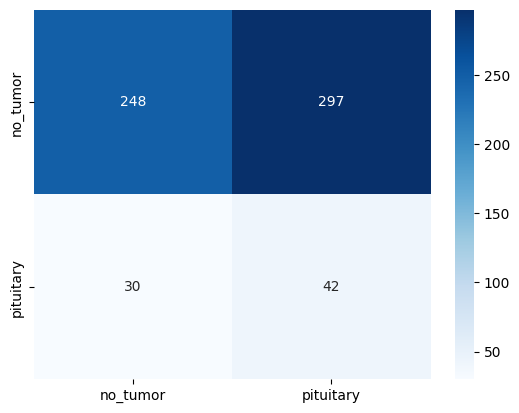

In [77]:
import seaborn as sns
cm = confusion_matrix(true_classes, predicted_classes)
#sns.heatmap(cm, annot=True, cmap='Blues')
cm_data = [[248, 42], [30, 297]]
sns.heatmap(cm_data, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)

# Graphs, Matrix

**331, batch 32**

Specificity: 0.0
Precision: 0.5688816855753647
Recall: 1.0
F1 Score: 0.7252066115702479

**331, batch 64**
tn:  96 fp:  170 fn:  129 tp:  222
Specificity: 0.3609022556390977
Precision: 0.5663265306122449
Recall: 0.6324786324786325
F1 Score: 0.5975773889636609

**331, batch 64, RELU**

tn:  266 fp:  0 fn:  351 tp:  0
Specificity: 1.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0

In [24]:
loss,acc = model_resnet.evaluate(valid_generator)

20/20 [==============================] - 6s 284ms/step - loss: 0.3824 - accuracy: 0.8233


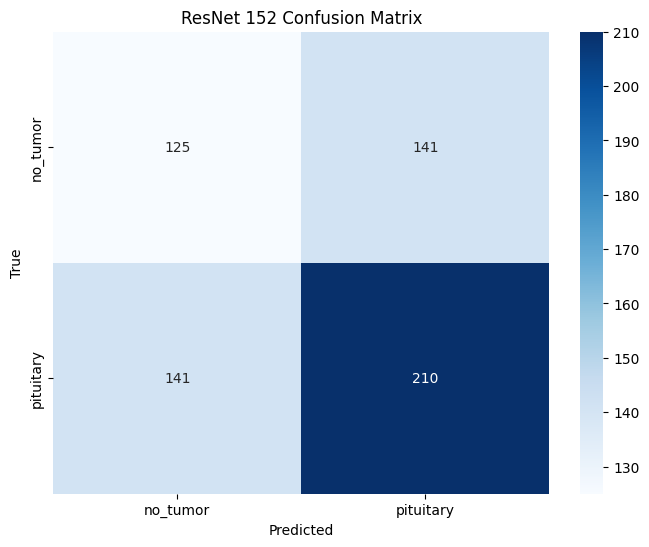

In [18]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('ResNet 152 Confusion Matrix')
plt.savefig(model_path + '/resnet_conf_matrix.png')
plt.show()

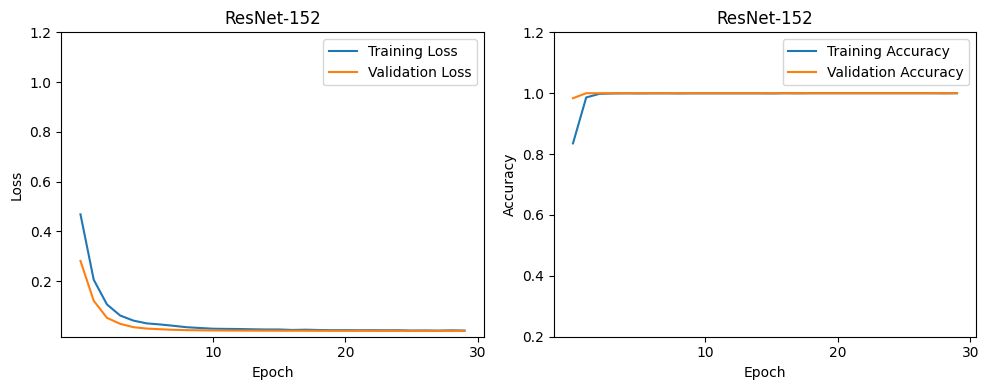

In [19]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history_resnet.history['loss'], label='Training Loss')
plt.plot(history_resnet.history['val_loss'], label='Validation Loss')
plt.title('ResNet-152')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.xticks([10, 20, 30])
plt.yticks([.2, .4, .6, .8, 1, 1.2])
plt.savefig(model_path + '/resnet_loss.png')


# Plot training accuracy and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_resnet.history['accuracy'], label='Training Accuracy')
plt.plot(history_resnet.history['val_accuracy'], label='Validation Accuracy')
plt.title('ResNet-152')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks([10, 20, 30])
plt.yticks([.2, .4, .6, .8, 1, 1.2])
plt.savefig(model_path + '/resnet_acc.png')
# Adjust layout and display the plot
plt.tight_layout()
plt.show()


# DenseNet 201

In [88]:
# Load the pre-trained ResNet50 model without the top (fully connected) layers
base_model = tf.keras.applications.DenseNet201(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

In [89]:
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom fully connected layers for classification
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
predictions = tf.keras.layers.Dense(num_classes, activation='sigmoid')(x)

# Create the final model
model_dense = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

In [90]:
# Compile the model
model_dense.compile(optimizer=opt, loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [91]:
# Train the model
start_time = time.time()

history_model_dense = model_dense.fit(train_generator,
          steps_per_epoch=train_generator.n // batch_size,
          epochs=50,
          validation_data=valid_generator ,
          validation_steps=valid_generator.n // batch_size
                                      )

Epoch 1/50
77/77 [==============================] - 36s 302ms/step - loss: 0.1101 - accuracy: 0.9582 - val_loss: 0.0894 - val_accuracy: 0.9605
Epoch 2/50
77/77 [==============================] - 22s 283ms/step - loss: 0.0271 - accuracy: 0.9930 - val_loss: 0.0645 - val_accuracy: 0.9720
Epoch 3/50
77/77 [==============================] - 27s 344ms/step - loss: 0.0178 - accuracy: 0.9959 - val_loss: 0.0985 - val_accuracy: 0.9638
Epoch 4/50
77/77 [==============================] - 26s 336ms/step - loss: 0.0145 - accuracy: 0.9967 - val_loss: 0.1221 - val_accuracy: 0.9523
Epoch 5/50
77/77 [==============================] - 28s 359ms/step - loss: 0.0110 - accuracy: 0.9984 - val_loss: 0.0895 - val_accuracy: 0.9638
Epoch 6/50
77/77 [==============================] - 27s 353ms/step - loss: 0.0081 - accuracy: 0.9988 - val_loss: 0.0527 - val_accuracy: 0.9852
Epoch 7/50
77/77 [==============================] - 23s 291ms/step - loss: 0.0072 - accuracy: 0.9988 - val_loss: 0.0753 - val_accuracy: 0.9671

In [92]:
end_time = time.time()
training_time = end_time - start_time
print(f"Training time for DenseNet 201: {training_time} seconds")

Training time for DenseNet 201: 1159.5039620399475 seconds


In [93]:
model_dense.save(model_path + '/dense201.h5')

# Model Evaluation Metrics for DenseNet


[link](https://machinelearningmastery.com/how-to-calculate-precision-recall-f1-and-more-for-deep-learning-models/)

In [94]:
# Evaluate the model
valid_generator.reset()
#predictions = model.predict(valid_generator, steps=valid_generator.n // batch_size)
start_time = time.time()
predictions = model_dense.predict(valid_generator)   #yhat_probs

end_time = time.time()

inference_time_batch = end_time - start_time
print("Inference time:", inference_time_batch)

# Get the predicted classes
predicted_classes = np.argmax(predictions, axis=1)    #yhat_classes

# Get the true classes
true_classes = valid_generator.classes


# Calculate performance metrics
confusion = confusion_matrix(true_classes, predicted_classes)
tn, fp, fn, tp = confusion.ravel()
print("tn: ", tn ,"fp: ", fp,"fn: ", fn,"tp: ", tp)
specificity = tn / (tn + fp)
precision = precision_score(true_classes, predicted_classes)
recall = recall_score(true_classes, predicted_classes)
f1 = f1_score(true_classes, predicted_classes)

# Print the performance metrics
print('Specificity:', specificity)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy =  (tp + tn) / ( tp + tn + fp + fn)
print("Accuracy: " , Accuracy)


20/20 [==============================] - 9s 279ms/step
Inference time: 9.4863862991333
tn:  106 fp:  160 fn:  148 tp:  203
Specificity: 0.39849624060150374
Precision: 0.559228650137741
Recall: 0.5783475783475783
F1 Score: 0.5686274509803922
Accuracy:  0.5008103727714749


In [28]:
# Evaluate the model
valid_generator.reset()
#predictions = model.predict(valid_generator, steps=valid_generator.n // batch_size)
predictions = model_dense.predict(valid_generator)

20/20 [==============================] - 4s 209ms/step


In [29]:
# Get the predicted classes
predicted_classes = np.argmax(predictions, axis=1)

# Get the true classes
true_classes = valid_generator.classes

In [30]:
# Calculate performance metrics
confusion = confusion_matrix(true_classes, predicted_classes)
tn, fp, fn, tp = confusion.ravel()
specificity = tn / (tn + fp)
precision = precision_score(true_classes, predicted_classes)
recall = recall_score(true_classes, predicted_classes)
f1 = f1_score(true_classes, predicted_classes)

# Print the performance metrics
print('Specificity:', specificity)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Specificity: 0.4699248120300752
Precision: 0.5982905982905983
Recall: 0.5982905982905983
F1 Score: 0.5982905982905983


In [31]:
Accuracy =  (tp + tn) / ( tp + tn + fp + fn)

In [32]:
Accuracy

0.5429497568881686

In [33]:
loss,acc = model_dense.evaluate(valid_generator)

20/20 [==============================] - 6s 289ms/step - loss: 4.7637e-05 - accuracy: 1.0000


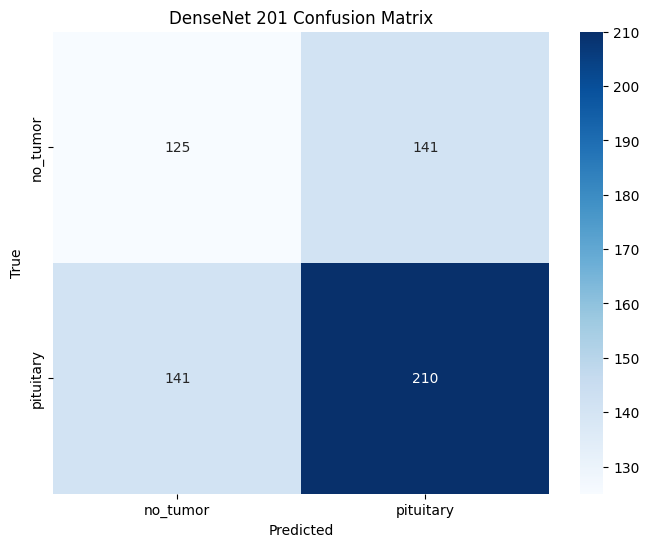

In [34]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('DenseNet 201 Confusion Matrix')
plt.savefig(model_path + '/densenet_conf_matrix.png')
plt.show()

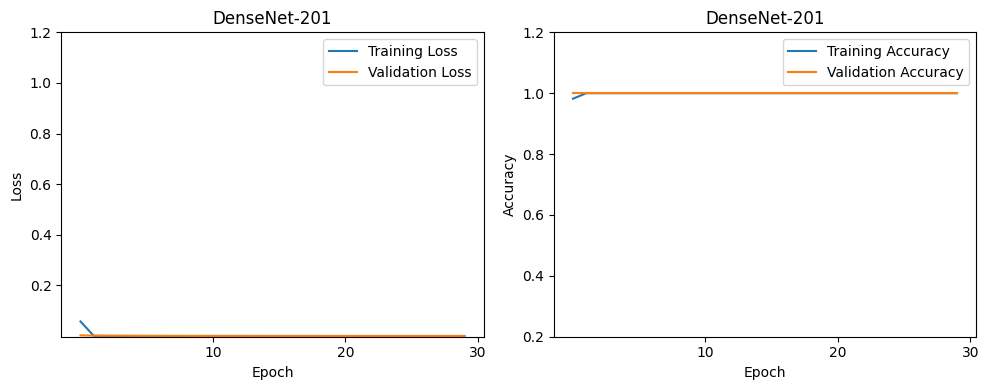

In [35]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history_model_dense.history['loss'], label='Training Loss')
plt.plot(history_model_dense.history['val_loss'], label='Validation Loss')
plt.title('DenseNet-201')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig(model_path + '/dense_loss.png')
plt.xticks([10, 20, 30])
plt.yticks([.2, .4, .6, .8, 1, 1.2])

# Plot training accuracy and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_model_dense.history['accuracy'], label='Training Accuracy')
plt.plot(history_model_dense.history['val_accuracy'], label='Validation Accuracy')
plt.title('DenseNet-201')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks([10, 20, 30])
plt.yticks([.2, .4, .6, .8, 1, 1.2])
plt.savefig(model_path + '/densenet_acc.png')
# Adjust layout and display the plot
plt.tight_layout()
plt.show()


# vgg 16

In [95]:
# Load the pre-trained ResNet50 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

In [96]:
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom fully connected layers for classification
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
predictions = tf.keras.layers.Dense(num_classes, activation='sigmoid')(x)

# Create the final model
model_vgg16 = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

In [97]:
# Compile the model
model_vgg16.compile(optimizer=opt, loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [98]:
# Train the model
start_time = time.time()

history_model_vgg16 = model_vgg16.fit(train_generator,
          steps_per_epoch=train_generator.n // batch_size,
          epochs=50,
          validation_data=valid_generator,
          validation_steps=valid_generator.n // batch_size)

Epoch 1/50
77/77 [==============================] - 20s 255ms/step - loss: 0.4387 - accuracy: 0.8737 - val_loss: 0.3804 - val_accuracy: 0.8684
Epoch 2/50
77/77 [==============================] - 22s 287ms/step - loss: 0.1816 - accuracy: 0.9487 - val_loss: 0.3557 - val_accuracy: 0.8684
Epoch 3/50
77/77 [==============================] - 25s 324ms/step - loss: 0.1277 - accuracy: 0.9635 - val_loss: 0.3281 - val_accuracy: 0.8750
Epoch 4/50
77/77 [==============================] - 22s 285ms/step - loss: 0.1023 - accuracy: 0.9713 - val_loss: 0.2854 - val_accuracy: 0.8882
Epoch 5/50
77/77 [==============================] - 22s 282ms/step - loss: 0.0864 - accuracy: 0.9746 - val_loss: 0.2170 - val_accuracy: 0.8964
Epoch 6/50
77/77 [==============================] - 20s 256ms/step - loss: 0.0743 - accuracy: 0.9774 - val_loss: 0.1692 - val_accuracy: 0.9178
Epoch 7/50
77/77 [==============================] - 21s 271ms/step - loss: 0.0647 - accuracy: 0.9820 - val_loss: 0.1748 - val_accuracy: 0.9178

In [99]:
end_time = time.time()
training_time = end_time - start_time
print(f"Training time for VGG 16: {training_time} seconds")

Training time for VGG 16: 1040.4228146076202 seconds


In [100]:
model_vgg16.save(model_path + '/vgg16.h5')

In [101]:
# Evaluate the model
valid_generator.reset()
#predictions = model.predict(valid_generator, steps=valid_generator.n // batch_size)
start_time = time.time()
predictions = model_vgg16.predict(valid_generator)

end_time = time.time()

inference_time_batch = end_time - start_time
print("Inference time:", inference_time_batch)

20/20 [==============================] - 5s 250ms/step
Inference time: 5.600356578826904


In [43]:
# Get the predicted classes
predicted_classes = np.argmax(predictions, axis=1)

# Get the true classes
true_classes = valid_generator.classes

In [44]:
# Calculate performance metrics
confusion = confusion_matrix(true_classes, predicted_classes)
tn, fp, fn, tp = confusion.ravel()
specificity = tn / (tn + fp)
precision = precision_score(true_classes, predicted_classes)
recall = recall_score(true_classes, predicted_classes)
f1 = f1_score(true_classes, predicted_classes)

# Print the performance metrics
print('Specificity:', specificity)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Specificity: 0.42105263157894735
Precision: 0.5612535612535613
Recall: 0.5612535612535613
F1 Score: 0.5612535612535613


In [45]:
Accuracy =  (tp + tn) / ( tp + tn + fp + fn)

In [46]:
Accuracy

0.5008103727714749

In [47]:
loss,acc = model_vgg16.evaluate(valid_generator)

20/20 [==============================] - 4s 214ms/step - loss: 1.7491e-04 - accuracy: 1.0000


In [48]:
loss

0.00017491135804448277

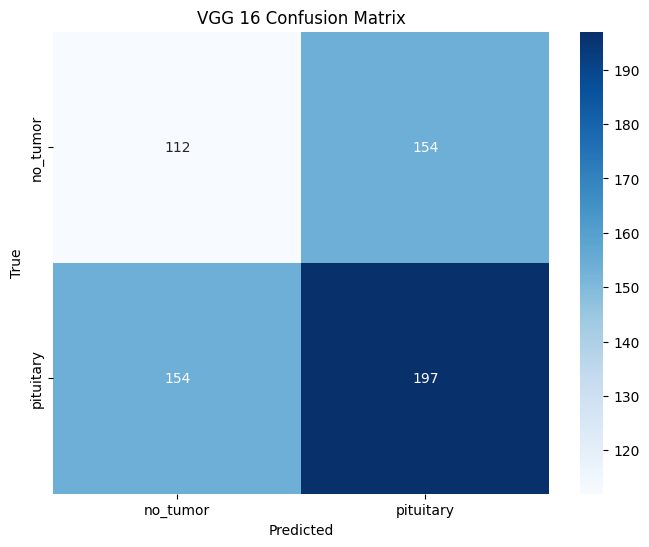

In [49]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('VGG 16 Confusion Matrix')
plt.savefig(model_path + '/vgg_conf_matrix.png')
plt.show()

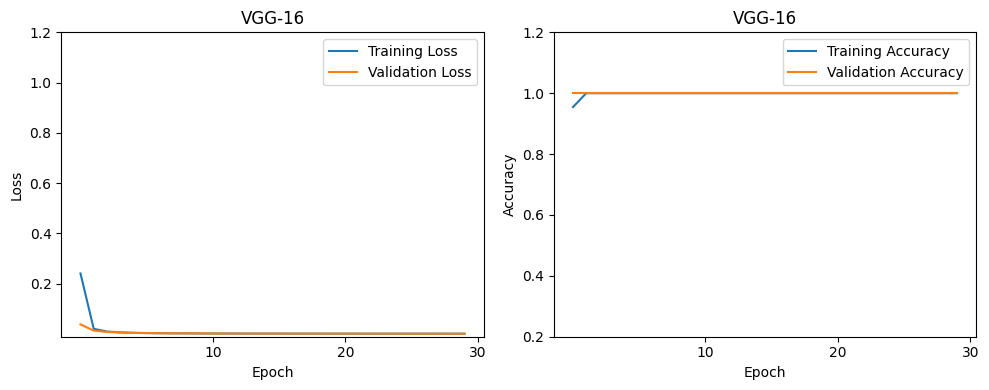

In [50]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history_model_vgg16.history['loss'], label='Training Loss')
plt.plot(history_model_vgg16.history['val_loss'], label='Validation Loss')
plt.title('VGG-16')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.xticks([10, 20, 30])
plt.yticks([.2, .4, .6, .8, 1, 1.2])
plt.savefig(model_path + '/vgg_loss.png')

# Plot training accuracy and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_model_vgg16.history['accuracy'], label='Training Accuracy')
plt.plot(history_model_vgg16.history['val_accuracy'], label='Validation Accuracy')
plt.title('VGG-16')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks([10, 20, 30])
plt.yticks([.2, .4, .6, .8, 1, 1.2])
plt.savefig(model_path + '/vgg_acc.png')
# Adjust layout and display the plot
plt.tight_layout()
plt.show()



# Model Evaluation Metrics for VGG
[link](https://machinelearningmastery.com/how-to-calculate-precision-recall-f1-and-more-for-deep-learning-models/)

In [51]:
# Evaluate the model
valid_generator.reset()
#predictions = model.predict(valid_generator, steps=valid_generator.n // batch_size)
predictions = model_vgg16.predict(valid_generator)   #yhat_probs

# Get the predicted classes
predicted_classes = np.argmax(predictions, axis=1)    #yhat_classes

# Get the true classes
true_classes = valid_generator.classes


# Calculate performance metrics
confusion = confusion_matrix(true_classes, predicted_classes)
tn, fp, fn, tp = confusion.ravel()
print("tn: ", tn ,"fp: ", fp,"fn: ", fn,"tp: ", tp)
specificity = tn / (tn + fp)
precision = precision_score(true_classes, predicted_classes)
recall = recall_score(true_classes, predicted_classes)
f1 = f1_score(true_classes, predicted_classes)

# Print the performance metrics
print('Specificity:', specificity)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy =  (tp + tn) / ( tp + tn + fp + fn)
print("Accuracy: " , Accuracy)

20/20 [==============================] - 4s 207ms/step
tn:  113 fp:  153 fn:  153 tp:  198
Specificity: 0.424812030075188
Precision: 0.5641025641025641
Recall: 0.5641025641025641
F1 Score: 0.5641025641025641
Accuracy:  0.5040518638573744


# full weight optimization section

In [102]:
m1 = load_model(model_path + '/resnet152.h5')

m1 = Model(inputs = m1.inputs, outputs = m1.outputs,
          name = 'resnet152')


m2 = load_model(model_path + '/dense201.h5')
m2 = Model(inputs = m2.inputs, outputs = m2.outputs,
          name = 'densenet201')


m3 = load_model(model_path + '/vgg16.h5')
m3 = Model(inputs = m3.inputs, outputs = m3.outputs,
          name = 'vgg16')

models = [m1, m2, m3]

In [103]:
len(models)

3

In [104]:
model_input = tf.keras.Input(shape = (img_height,img_width,3))
model_outputs = [model(model_input) for model in models]

In [107]:
class WeightedAverageLayer(tf.keras.layers.Layer):
    def __init__(self, w1, w2, w3, **kwargs):
        super(WeightedAverageLayer, self).__init__(**kwargs)
        self.w1 = w1
        self.w2 = w2
        self.w3 = w3

    def call(self, inputs):
        return self.w1 * inputs[0] + self.w2 * inputs[1] + self.w3 * inputs[2]
    #added -------------------------------------------------------------------------------------------------------------
    # def get_config(self, w1, w2, w3):
    #     config = super().get_config()
    #     config.update({
    #         self.w1 = w1
    #         self.w2 = w2
    #         self.w3 = w3
    #         })
    #     return config

In [108]:
num = [[.5, .1, .4]]

In [ ]:

opt = Adam(learning_rate = 0.0001)
j = 0
for i in num:
    a = num[j][0]
    b = num[j][1]
    c = num[j][2]
    print(a,b,c)
    ensemble_output = WeightedAverageLayer(a,b,c)(model_outputs)
    final_model = tf.keras.Model(inputs = model_input, outputs = ensemble_output)

    final_model.compile(optimizer = opt, loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

    start_time = time.time()

    history_final = final_model.fit(
        train_generator,
          steps_per_epoch=train_generator.n // batch_size,
          epochs=50,
          validation_data=valid_generator,
          validation_steps=valid_generator.n // batch_size
    )

    end_time = time.time()
    training_time = end_time - start_time

    print(f"Training time: {training_time} seconds")

    loss,acc = final_model.evaluate(valid_generator)

    # with open('/content/drive/MyDrive/Colab Notebooks/model/original data model/weight(original).txt', 'a') as file:
    # #for number in numbers:
    #     # Write the number to the file, followed by a newline
    #     file.write(str(a) + ' ' + str(b) + ' ' + str(c) + ' ' + str(loss) + ' ' + str(acc) + '\n')

    j = j+1

0.5 0.1 0.4
Epoch 1/50
77/77 [==============================] - 90s 809ms/step - loss: 0.0385 - accuracy: 0.9951 - val_loss: 0.0799 - val_accuracy: 0.9836
Epoch 2/50
77/77 [==============================] - 56s 723ms/step - loss: 0.0375 - accuracy: 0.9959 - val_loss: 0.0801 - val_accuracy: 0.9836
Epoch 3/50
77/77 [==============================] - 57s 737ms/step - loss: 0.0360 - accuracy: 0.9963 - val_loss: 0.0895 - val_accuracy: 0.9770
Epoch 4/50
77/77 [==============================] - 63s 822ms/step - loss: 0.0366 - accuracy: 0.9959 - val_loss: 0.0788 - val_accuracy: 0.9836
Epoch 5/50
77/77 [==============================] - 75s 981ms/step - loss: 0.0330 - accuracy: 0.9967 - val_loss: 0.0722 - val_accuracy: 0.9836
Epoch 6/50
77/77 [==============================] - 83s 1s/step - loss: 0.0325 - accuracy: 0.9963 - val_loss: 0.0817 - val_accuracy: 0.9786
Epoch 7/50
77/77 [==============================] - 90s 1s/step - loss: 0.0329 - accuracy: 0.9967 - val_loss: 0.0728 - val_accuracy: 

In [ ]:
final_model.save(model_path + '/final.h5')

# New Section

In [ ]:
# Evaluate the model
valid_generator.reset()
start_time = time.time()
#predictions = model.predict(valid_generator, steps=valid_generator.n // batch_size)
predictions = final_model.predict(valid_generator)
end_time = time.time()

inference_time_batch = end_time - start_time
print("Inference time:", inference_time_batch)

In [ ]:
inference_time_batch

In [ ]:
# Get the predicted classes
predicted_classes = np.argmax(predictions, axis=1)

# Get the true classes
true_classes = valid_generator.classes

In [ ]:
# Calculate performance metrics
confusion = confusion_matrix(true_classes, predicted_classes)
tn, fp, fn, tp = confusion.ravel()
specificity = tn / (tn + fp)
precision = precision_score(true_classes, predicted_classes)
recall = recall_score(true_classes, predicted_classes)
f1 = f1_score(true_classes, predicted_classes)

# Print the performance metrics
print('Specificity:', specificity)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

In [ ]:
Accuracy =  (tp + tn) / ( tp + tn + fp + fn)
print(Accuracy)

In [ ]:
loss,acc = final_model.evaluate(valid_generator)

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig(model_path + '/final_conf_matrix.png')
plt.show()

In [ ]:
#plot loss and accuracy graph

x = np.arange(1, 20)
y = np.arange(0.0, 1.0)
#y = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

#Plot the Loss Curves
plt.figure(figsize=[6,4])
#plt.xlim(0, 20)
#plt.ylim(0, 1)
#plt.xticks(np.arange(2,21,2))
#plt.yticks(np.arange(0.0, 1.0, 0.1))
print(len(history_final.history['loss']) )
plt.plot(range(1, len(history_final.history['loss']) + 1 ), history_final.history['loss'],'r')
plt.plot(range(1, len(history_final.history['val_loss']) + 1), history_final.history['val_loss'],'b')
#plt.plot(history_final.history['loss'],'r')
#plt.plot(history_final.history['val_loss'],'b')
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Ensemble Model Loss Curves')
plt.xticks([10, 20])
plt.yticks([.2, .4, .6, .8, 1, 1.2])
#plt.show()
plt.savefig(model_path + '/final_loss.png')

#Plot the Accuracy Curves
plt.figure(figsize=[6,4])
#plt.plot(history_final.history['accuracy'],'r')
#plt.plot(history_final.history['val_accuracy'],'b')
plt.plot(range(1, len(history_final.history['accuracy']) + 1 ), history_final.history['accuracy'],'r')
plt.plot(range(1, len(history_final.history['val_accuracy']) + 1), history_final.history['val_accuracy'],'b')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epochs ')
plt.ylabel('Accuracy')
plt.title('Ensemble Model Accuracy Curves')
plt.xticks([10, 20])
plt.yticks([.2, .4, .6, .8, 1, 1.2])
#plt.show()
plt.savefig(model_path + '/final_acc.png')

# Model Evaluation Metrics
[link](https://machinelearningmastery.com/how-to-calculate-precision-recall-f1-and-more-for-deep-learning-models/)

In [ ]:
# Evaluate the model
valid_generator.reset()
#predictions = model.predict(valid_generator, steps=valid_generator.n // batch_size)
predictions = final_model.predict(valid_generator)   #yhat_probs

# Get the predicted classes
predicted_classes = np.argmax(predictions, axis=1)    #yhat_classes

# Get the true classes
true_classes = valid_generator.classes


# Calculate performance metrics
confusion = confusion_matrix(true_classes, predicted_classes)
tn, fp, fn, tp = confusion.ravel()
print("tn: ", tn ,"fp: ", fp,"fn: ", fn,"tp: ", tp)
specificity = tn / (tn + fp)
precision = precision_score(true_classes, predicted_classes)
recall = recall_score(true_classes, predicted_classes)
f1 = f1_score(true_classes, predicted_classes)

# Print the performance metrics
print('Specificity:', specificity)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy =  (tp + tn) / ( tp + tn + fp + fn)
print("Accuracy: " , Accuracy)